# Prelucrarea Semnalelor
## Laborator 6
### Miu Elena Adania
### Grupa 333

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Ex1.
### Generati un vector x[n] aleator de dimensiune N = 100. Calculati iteratia x ← x ∗ x de trei ori. Afisati cele patru grafice. Ce observati?

In [2]:
N = 100
x = np.random.rand(N)

In [3]:
x1 = x * x
x2 = x1 * x1
x3 = x2 * x2

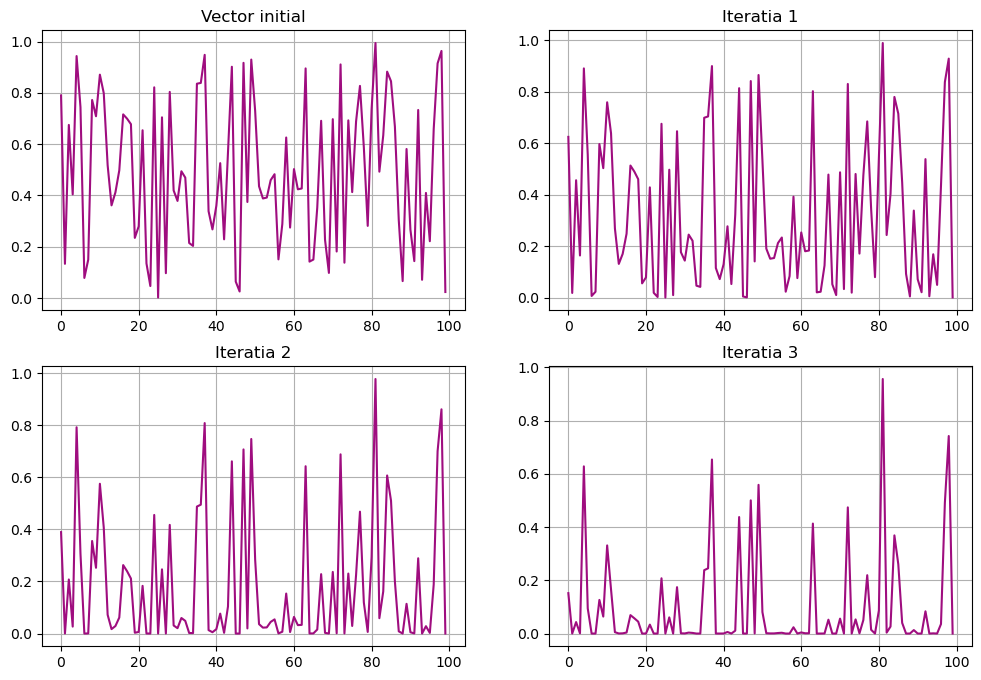

In [4]:
figure, axis = plt.subplots(2, 2, figsize=(12, 8))

axis = axis.flatten()

axis[0].plot(x, color='#9F0D7F')
axis[0].set_title("Vector initial")

axis[1].plot(x1, color='#9F0D7F')
axis[1].set_title("Iteratia 1")

axis[2].plot(x2, color='#9F0D7F')
axis[2].set_title("Iteratia 2")

axis[3].plot(x3, color='#9F0D7F')
axis[3].set_title("Iteratia 3")

for ax in axis:
    ax.grid(True)

plt.show()

#### Se observa ca valorile cresc exponenntial.

## Ex2
### Vi se dau doua polinoame p(x) si q(x) cu grad maxim N generate aleator cu coeficienti intregi. Calculati produsul lor r(x) = p(x)q(x) folosind convolutia: folosind inmultirea polinoamelor directa si apoi folosind fft.

In [5]:
N = 5
p = np.random.randint(-10, 10, size=N + 1)
q = np.random.randint(-10, 10, size=N + 1)

In [6]:
# Inmultirea polinoamelor
conv_direct = np.convolve(p, q)

# FFT
p_fft = np.fft.fft(p)
q_fft = np.fft.fft(q)
conv_fft = np.round(np.fft.ifft(p_fft * q_fft).real)

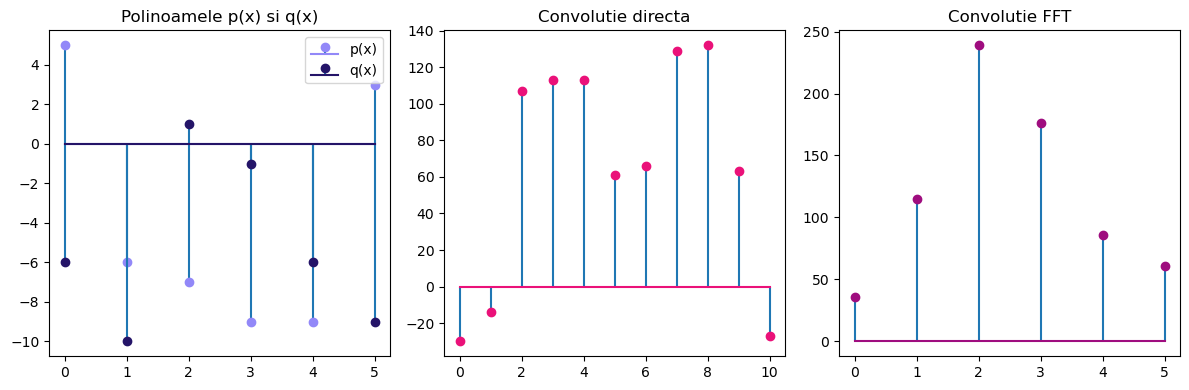

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.stem(p, basefmt='#9288F8', markerfmt='#9288F8', label="p(x)")
plt.stem(q, basefmt='#241468', markerfmt='#241468', label="q(x)")
plt.title("Polinoamele p(x) si q(x)")
plt.legend()

plt.subplot(1, 3, 2)
plt.stem(conv_direct, basefmt='#EA1179', markerfmt='#EA1179')
plt.title("Convolutie directa")

plt.subplot(1, 3, 3)
plt.stem(conv_fft, basefmt='#9F0D7F', markerfmt='#9F0D7F')
plt.title("Convolutie FFT")

plt.tight_layout()
plt.show()

## Ex3
### Scrieti cate o functie prin care sa construiti o fereastra dreptunghiulara si o fereastra de tip Hanning. Functiile primesc ca parametru dimensiunea ferestrei. Afisati grafic o sinusoida cu f = 100, A = 1 si φ = 0 trecuta prin cele doua tipuri de ferestre de dimensiune Nw = 200.

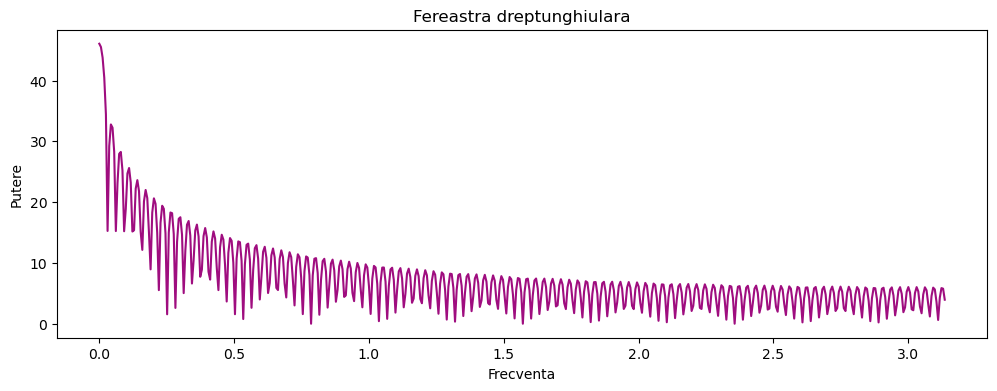

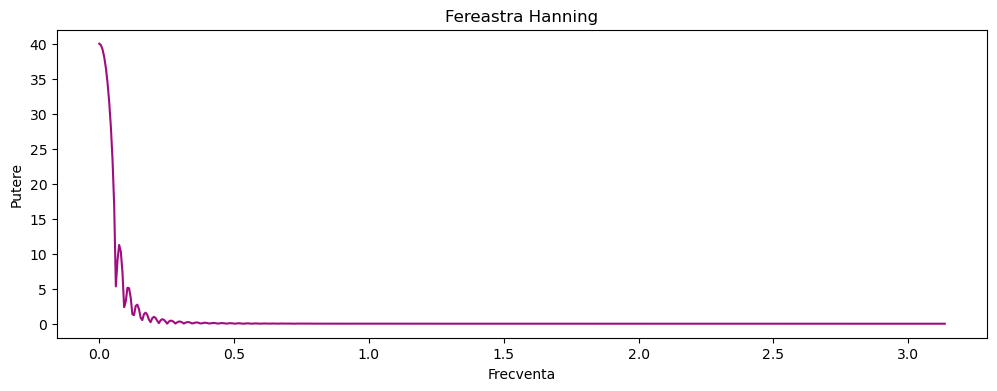

In [8]:
def dreptunghiulara(nw):
    return np.ones(nw)

def hanning(nw):
    return np.array([0.5 * (1 - np.cos((2 * np.pi * i) / nw)) for i in range(nw)])

def plot_fereastra(nume, fereastra):
    w, h = scipy.signal.freqz(fereastra)
    plt.figure(figsize=(12, 4))
    plt.title(nume)
    
    plt.xlabel("Frecventa")
    plt.ylabel("Putere")
    
    plt.plot(w, 20 * np.log10(np.abs(h) + 1), color='#9F0D7F')
    plt.show()

Nw = 200
plot_fereastra("Fereastra dreptunghiulara", dreptunghiulara(Nw))
plot_fereastra("Fereastra Hanning", hanning(Nw))

In [9]:
frecventa = 100  
timp = np.linspace(0, 0.2, 200)

x = np.sin(2 * np.pi * frecventa * timp)


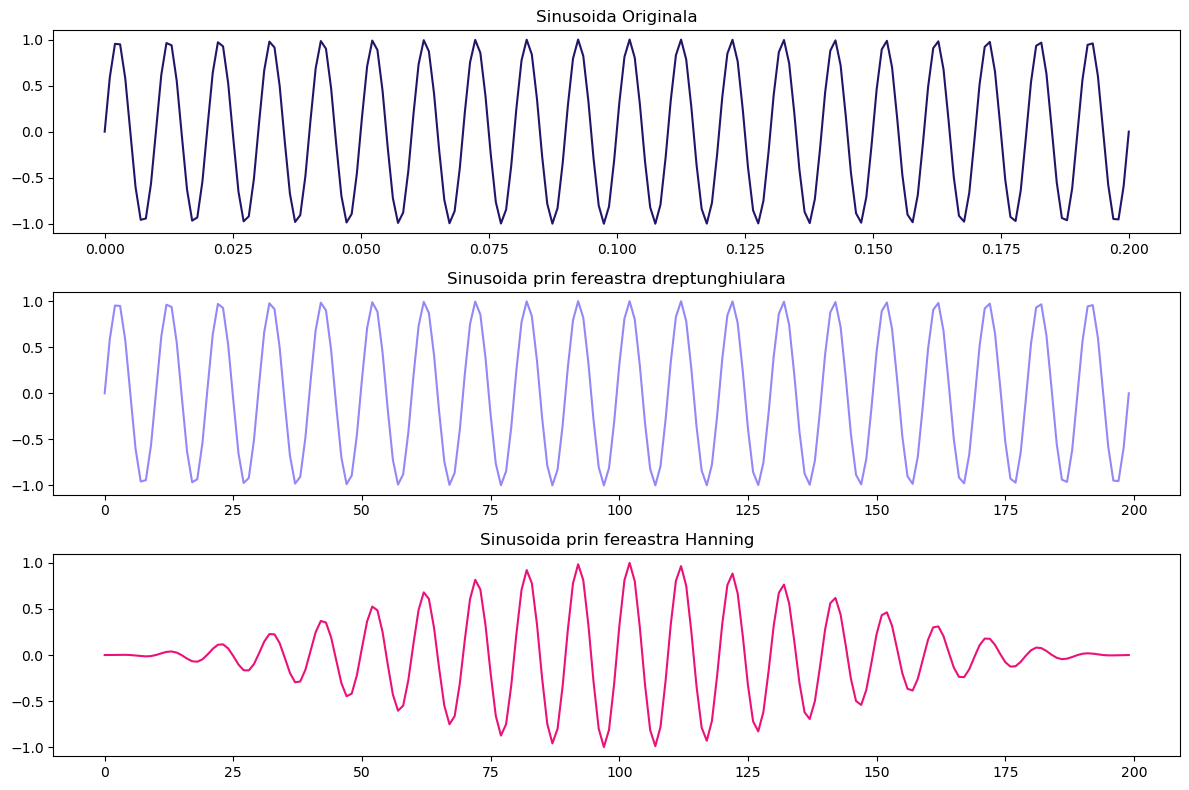

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title("Sinusoida Originala")
plt.plot(timp, x[:Nw], color='#241468')

plt.subplot(3, 1, 2)
plt.title("Sinusoida prin fereastra dreptunghiulara")
plt.plot(dreptunghiulara(Nw) * x[:Nw], color='#9288F8')

plt.subplot(3, 1, 3)
plt.title("Sinusoida prin fereastra Hanning")
plt.plot(hanning(Nw) * x[:Nw], color='#EA1179')

plt.tight_layout()
plt.show()

## Ex4
### Fisierul Train.csv contine date de trafic inregistrate pe o perioada de 1 saptamana. Perioada de esantionare este de 1 ora, iar valorile masurate reprezinta numarul de vehicule ce trec printr-o anumita locatie.

### a) Selectati din semnalul dat o portiune corespunzatoare pentru 3 zile, x, pe care veti lucra in continuare.

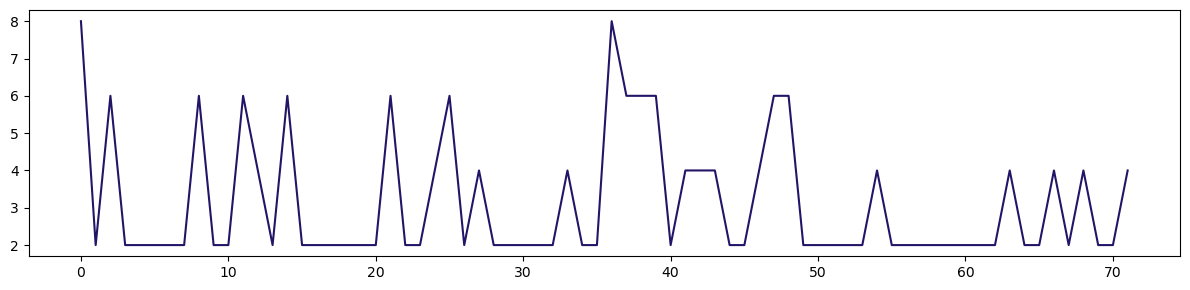

In [11]:
x = np.genfromtxt("Train.csv", delimiter=',', usecols=2, skip_header=1)
x = x[:72]

plt.figure(figsize=(12, 3))
plt.plot(x, color='#241468')
plt.tight_layout()
plt.show()

### b) Utilizati functia np.convolve(x, np.ones(w), ’valid’) / w pentru a realiza un filtru de tip medie alunecatoare si neteziti semnalul obtinut anterior. Setati dimensiuni diferite ale ferestrei, spre exemplu 5, 9, 13, 17.

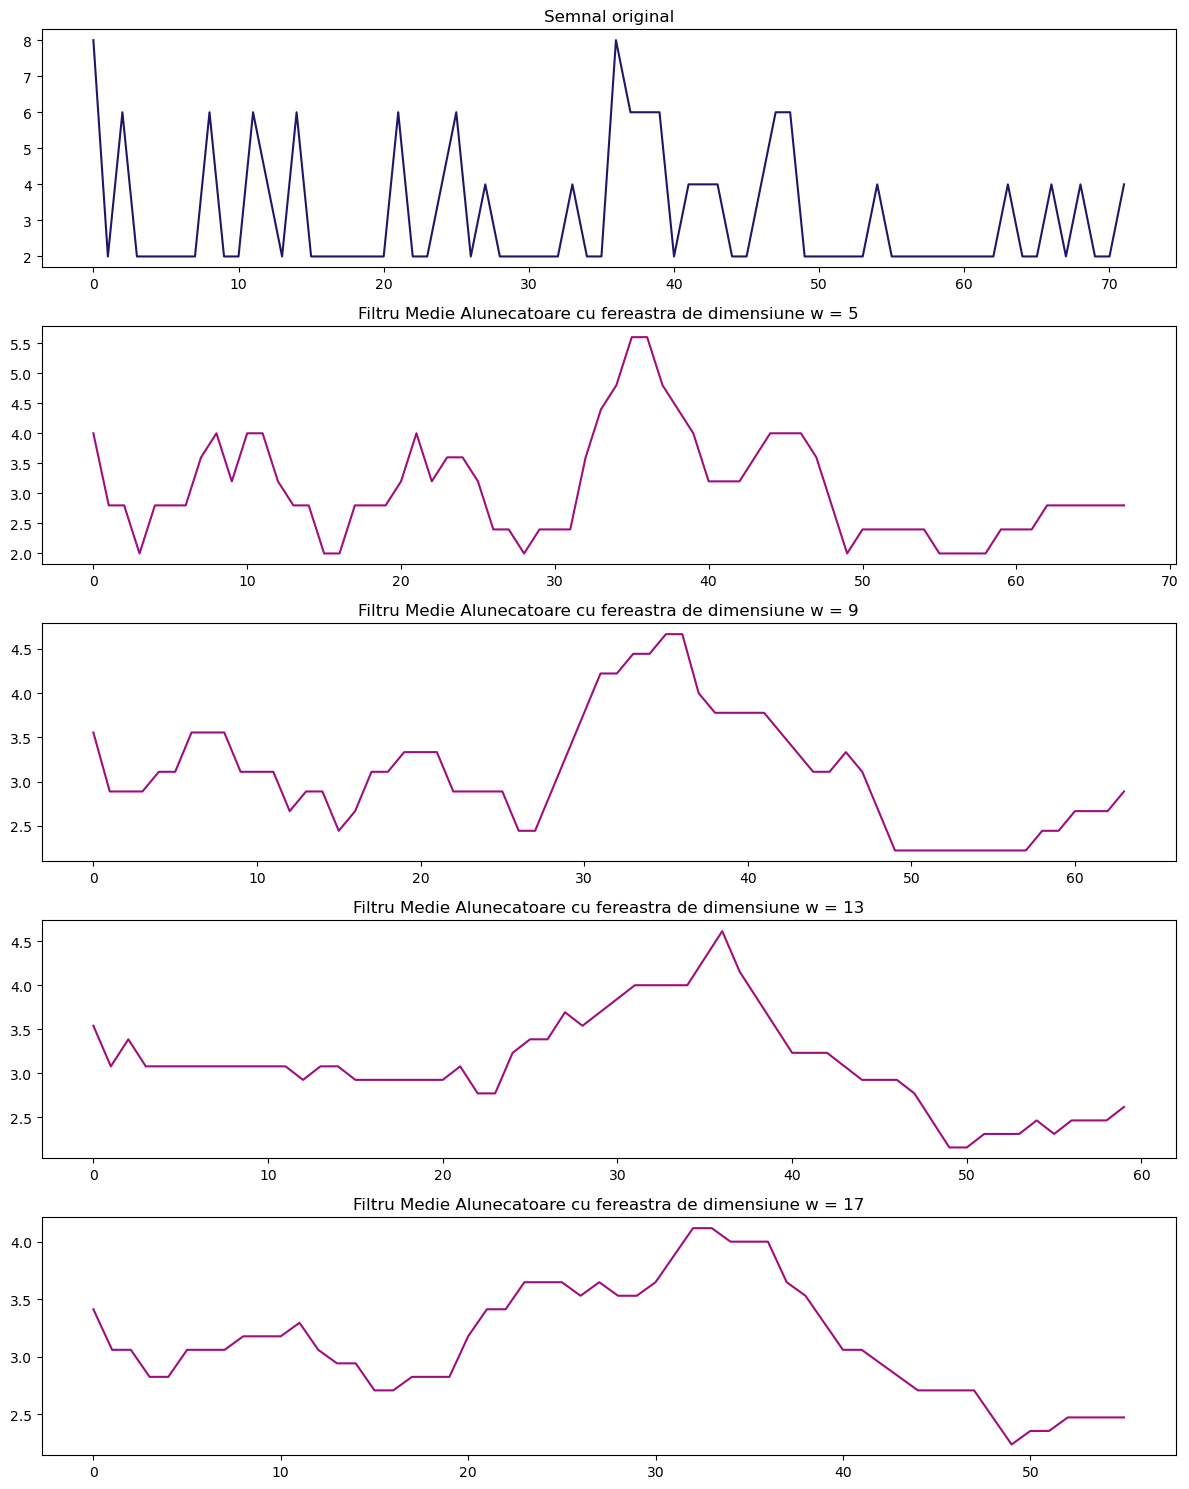

In [12]:
timp = np.array([i for i in range(72)])
w_list = [5, 9, 13, 17]

filtru = [np.convolve(x, np.ones(w), 'valid') / w for w in w_list]

figure, axis = plt.subplots(5, figsize=(12, 15))

axis[0].set_title("Semnal original")
axis[0].plot(timp, x, color='#241468')

for i in range(1, len(w_list) + 1):
    filtru_x = filtru[i - 1]
    
    axis[i].set_title(f"Filtru Medie Alunecatoare cu fereastra de dimensiune w = {str(w_list[i - 1])}")
    axis[i].plot(range(len(filtru_x)), filtru_x, color='#9F0D7F')
    
plt.tight_layout()
plt.show()